In [1]:
import pystan
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("EfronMorrisBB.txt",sep="\t")
print df.head()
df_s=df[["FirstName", "LastName","Hits", "At-Bats", "RemainingAt-Bats"]]
print df_s.head()
#df_s['RemainingHits']=df['SeasonHits']-df['Hits']
#df_s.head()


  FirstName   LastName  At-Bats  Hits  BattingAverage  RemainingAt-Bats  \
0   Roberto   Clemente       45    18           0.400               367   
1     Frank   Robinson       45    17           0.378               426   
2     Frank     Howard       45    16           0.356               521   
3       Jay  Johnstone       45    15           0.333               275   
4       Ken      Berry       45    14           0.311               418   

   RemainingAverage  SeasonAt-Bats  SeasonHits  SeasonAverage  
0            0.3460            412         145          0.352  
1            0.2981            471         144          0.306  
2            0.2764            566         160          0.283  
3            0.2218            320          76          0.238  
4            0.2727            463         128          0.276  
  FirstName   LastName  Hits  At-Bats  RemainingAt-Bats
0   Roberto   Clemente    18       45               367
1     Frank   Robinson    17       45               4

In [3]:
N = df_s.shape[0]
K = df_s['At-Bats']
#print K
y = df_s['Hits']
#print y
K_new =df_s['RemainingAt-Bats']
y_new =df['SeasonHits']-df['Hits']


In [4]:
## Complete Pooling
complete_pooling_stan = """
data {
  int<lower=0> N;           // items
  int<lower=0> K[N];        // initial trials
  int<lower=0> y[N];        // initial successes

  int<lower=0> K_new[N];    // new trials
  int<lower=0> y_new[N];    // new successes
}
parameters {
  real<lower=0, upper=1> phi;  // chance of success (pooled)
}
model {
  y ~ binomial(K, phi);
}
"""


In [5]:
data_list = {'N' : N, 'K' : K, 'y':y,'K_new':K_new,'y_new':y_new}
#data_list



In [6]:
# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = complete_pooling_stan, data = data_list,iter=5000)
# Plotting and summarizing the posterior distribution
print(stan_samples)


Inference for Stan model: anon_model_bd192a053b20f3cf8b06aad69dd2f718.
4 chains, each with iter=5000; warmup=2500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
phi    0.27  2.0e-4   0.02   0.24   0.26   0.27   0.28    0.3 5860.0    1.0
lp__ -470.8    0.01   0.74 -472.9 -471.0 -470.5 -470.4 -470.3 4698.0    1.0

Samples were drawn using NUTS at Sat Feb 24 22:21:58 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


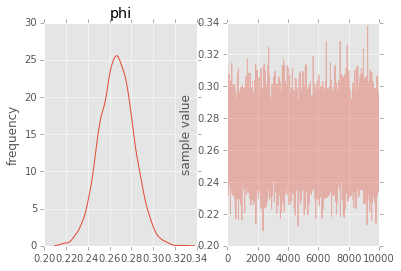

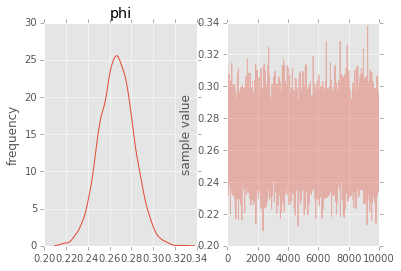

In [7]:
stan_samples.plot()